<a href="https://colab.research.google.com/github/syifaniads/KAL-CODE/blob/main/BAB_3_Syifani_Adillah_Salsabila_235150207111052.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum Kecerdasan Artifisial Lanjut


---
## Bab 3. Representasi Data


## Instalasi Library
Jalankan kode berikut untuk memastikan library telah terinstal di Google Colab.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import sklearn

print(f'numpy: {np.__version__}')  # numpy
print(f'Pandas: {pd.__version__}')  # pandas
print(f'Matplotlib: {matplotlib.__version__}')  # matplotlib
print(f'Scipy: {scipy.__version__}')  # scipy
print(f'Sklearn: {sklearn.__version__}')  # sklearn

numpy: 1.26.4
Pandas: 2.2.2
Matplotlib: 3.10.0
Scipy: 1.14.1
Sklearn: 1.6.1


## Memuat Dataset
### Memuat Dataset Lokal
Unggah file `kontak.csv` ke Google Colab menggunakan kode berikut:

In [ ]:
from google.colab import files
kontak = files.upload()

for fn in kontak.keys():
  print(f'Nama file "{fn}" dengan panjang {len(kontak[fn])} bytes')

Saving Kontak.CSV to Kontak.CSV
Nama file "Kontak.CSV" dengan panjang 106 bytes


### Memuat Dataset dari Internet
Unduh dataset Iris menggunakan wget:

In [ ]:
! wget https://dataset-kal.s3.us-east-1.amazonaws.com/iris_missing.csv

--2025-03-13 05:30:46--  https://dataset-kal.s3.us-east-1.amazonaws.com/iris_missing.csv
Resolving dataset-kal.s3.us-east-1.amazonaws.com (dataset-kal.s3.us-east-1.amazonaws.com)... 52.217.70.192, 54.231.166.130, 16.182.67.154, ...
Connecting to dataset-kal.s3.us-east-1.amazonaws.com (dataset-kal.s3.us-east-1.amazonaws.com)|52.217.70.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4593 (4.5K) [text/csv]
Saving to: ‘iris_missing.csv’

iris_missing.csv    100%[===================>]   4.49K  --.-KB/s    in 0s      

2025-03-13 05:30:46 (118 MB/s) - ‘iris_missing.csv’ saved [4593/4593]



### Cek File
Cek file yang telah diunduh atau diunggah menggunakan perintah berikut:

In [ ]:
!ls

iris_missing.csv  Kontak.CSV  sample_data


## Membaca Format CSV
### Menggunakan List

In [ ]:
import csv

def csv_list(filename):
  data = []

  with open(filename, mode='r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')

    for row in csv_reader:
      data.append(row)

  data.pop(0) #menghapus baris header
  return data

In [ ]:
list_kontak = csv_list("Kontak.CSV")  # Sesuaikan dengan nama file yang benar
print(list_kontak)

[['1', 'Achamad Ali', '081234'], ['2', 'Budi Utomo', '08712333'], ['3', 'Toni Saja', '08733311'], ['4', 'Dewi Utami', '0851231']]


### Menggunakan Dictionary

In [ ]:
import csv

def csv_dict(filename):
  data = []

  with open(filename, mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    for row in csv_reader:
      data.append(row)

  return data

## Membaca CSV menggunakan Pandas

In [ ]:
iris_df = pd.read_csv('/content/iris_missing.csv')

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,0.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Meringkas Kumpulan Data

In [ ]:
print (iris_df.head(6))
print (iris_df.shape)
print (iris_df.describe())
print(iris_df.groupby('Species').size())

   sepal_length  sepal_width  petal_length  petal_width      Species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           0.0          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
(150, 5)
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.731333     2.988000      3.684667     1.147333
std        1.153352     0.604893      1.826675     0.773790
min        0.000000     0.000000      0.000000     0.000000
25%        5.100000     2.800000      1.500000     0.225000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.40

## Visualisasi Kumpulan Data
### Box Plot

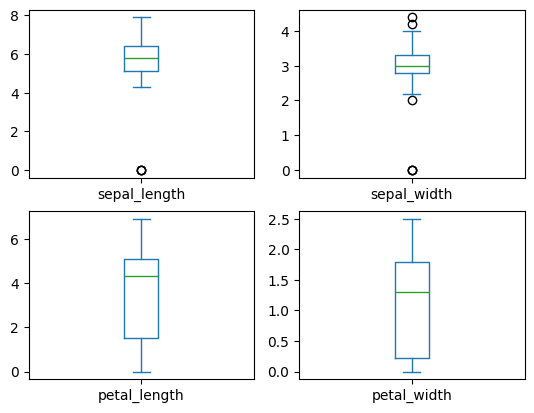

In [ ]:
from matplotlib import pyplot
iris_df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()


### Histogram

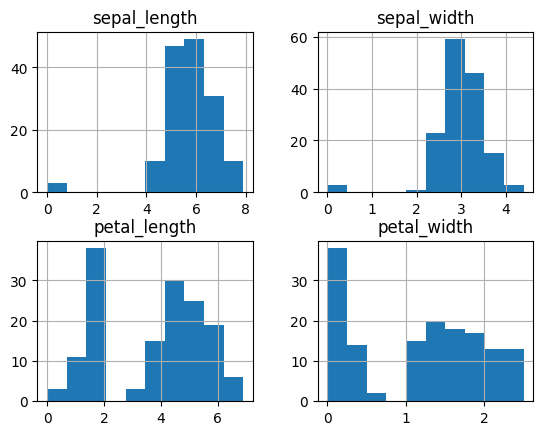

In [ ]:
iris_df.hist()
pyplot.show()

### Scatter Plot Matrix

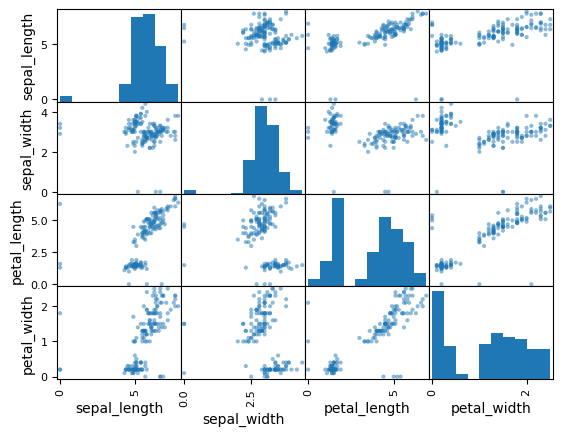

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(iris_df)
plt.show()

## Tugas
1. Download Glass dataset dari https://archive.ics.uci.edu/dataset/42/glass+identification
2. Masukkan data Glass ke dataframe menggunakan Pandas.
3. Tampilkan 10 data pertama.
4. Hitung rata-rata nilai per variabel untuk setiap data.
5. Hitung rata-rata nilai per variabel dikelompokkan berdasarkan `Type`.
6. Buatlah plot bertipe 'line' untuk masing-masing variabelnya menggunakan Pandas Plot.

## Soal 1

In [ ]:
# 1️ Download dataset menggunakan wget
import pandas as pd
import matplotlib.pyplot as plt
!wget -O glass.data https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data

--2025-03-13 05:48:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘glass.data’

glass.data              [ <=>                ]  11.62K  --.-KB/s    in 0s      

2025-03-13 05:48:49 (123 MB/s) - ‘glass.data’ saved [11903]



saya menggunakan command untuk mengimpor pandas untuk manipulasi data dan matplotlib untuk buat plot. Saya menggunakan !wget -o glass.data untuk memberikan nama file langsung begitu selesai diunduh. Menggunakan wget mempermudah unduh file langsung ke lingkungan kerja dan tidak perlu download manual.

## Soal 2

In [ ]:
# 2 Masukkan data Glass ke dataframe menggunakan Pandas.
kolom = ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
data_glass = pd.read_csv("glass.data", header=None, names=kolom)
data_glass.drop(columns=["ID"], inplace=True)

Dataset asli memiliki 11 kolom, dengan kolom pertama adalah ID yang tidak diperlukan sehingga saya menghapusnya dengan data_glass.drop(columns=["ID"], inplace=True)

## Soal 3

In [ ]:
# 3️ Tampilkan 10 data pertama
print("10 Data Pertama:")
print(df.head(10))

10 Data Pertama:
         RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
1   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
2   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
3   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
4   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
5   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
6   1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
7   1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
8   1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
9   1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1


Saya menggunakan df.head(10) untuk mengambil 10 baris pertama dari DataFrame df dan menampilkannya.

## Soal 4

In [ ]:
# 4️ Hitung rata-rata nilai per variabel
rata_rata_variabel = df.agg('mean', numeric_only=True)
print("\nRata-rata Setiap Variabel:")
print(rata_rata_variabel)


Rata-rata Setiap Variabel:
RI       1.518365
Na      13.407850
Mg       2.684533
Al       1.444907
Si      72.650935
K        0.497056
Ca       8.956963
Ba       0.175047
Fe       0.057009
Type     2.780374
dtype: float64


saya menggunakan kode .agg() karena merupakan metode yang lebih fleksibel dibanding .mean() karena bisa digunakan untuk berbagai fungsi statistik sekaligus dan bisa digunakan untuk menerapkan beberapa agregasi sekaligus, misalnya df.agg(['mean', 'median', 'std']) untuk rata-rata, median, dan standar deviasi. Sedangkan, numeric only true untuk menghindari error jika ada kolom non-numerik dalam dataset.

## Soal 5

In [ ]:
# 5️ Hitung rata-rata nilai per variabel berdasarkan 'Type'
rata_rata_per_type = df.groupby("Type").agg("mean", numeric_only=True)
print("\nRata-rata Tiap Variabel Berdasarkan Type:")
print(rata_rata_per_type)



Rata-rata Tiap Variabel Berdasarkan Type:
            RI         Na        Mg        Al         Si         K         Ca  \
Type                                                                            
1     1.518718  13.242286  3.552429  1.163857  72.619143  0.447429   8.797286   
2     1.518619  13.111711  3.002105  1.408158  72.598026  0.521053   9.073684   
3     1.517964  13.437059  3.543529  1.201176  72.404706  0.406471   8.782941   
5     1.518928  12.827692  0.773846  2.033846  72.366154  1.470000  10.123846   
6     1.517456  14.646667  1.305556  1.366667  73.206667  0.000000   9.356667   
7     1.517116  14.442069  0.538276  2.122759  72.965862  0.325172   8.491379   

            Ba        Fe  
Type                      
1     0.012714  0.057000  
2     0.050263  0.079737  
3     0.008824  0.057059  
5     0.187692  0.060769  
6     0.000000  0.000000  
7     1.040000  0.013448  


saya menggunakan df.groupby("Type") untuk mengelompokkan data berdasarkan kolom Type dan .agg("mean", numeric_only=True) untuk menghitung rata-rata untuk kolom numerik saja.

## Soal 6

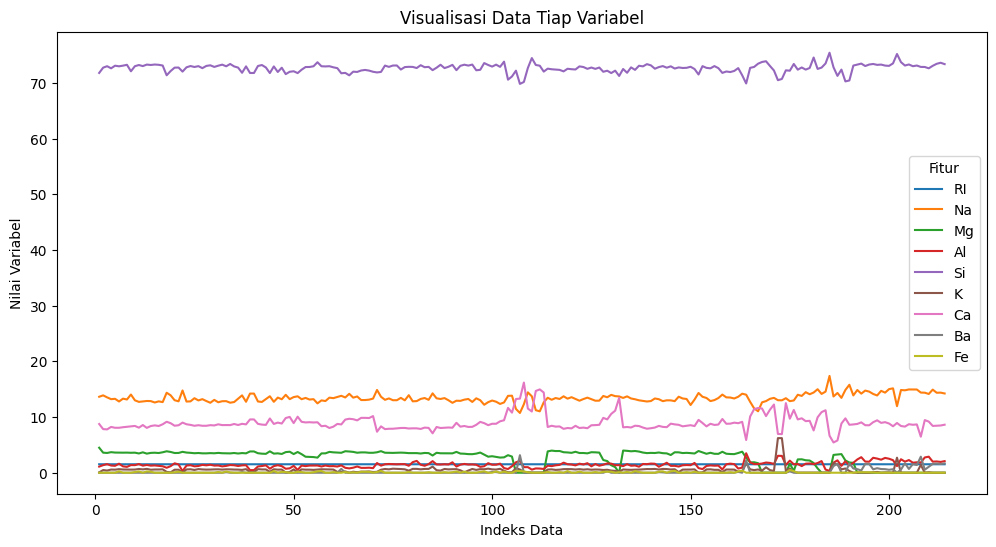

In [ ]:
# 6️ Buat plot bertipe 'line' untuk setiap variabel
df.loc[:, df.columns != "Type"].plot(kind="line", figsize=(12, 6), title="Visualisasi Data Tiap Variabel")
plt.xlabel("Indeks Data")
plt.ylabel("Nilai Variabel")
plt.legend(title="Fitur")
plt.show()


atau

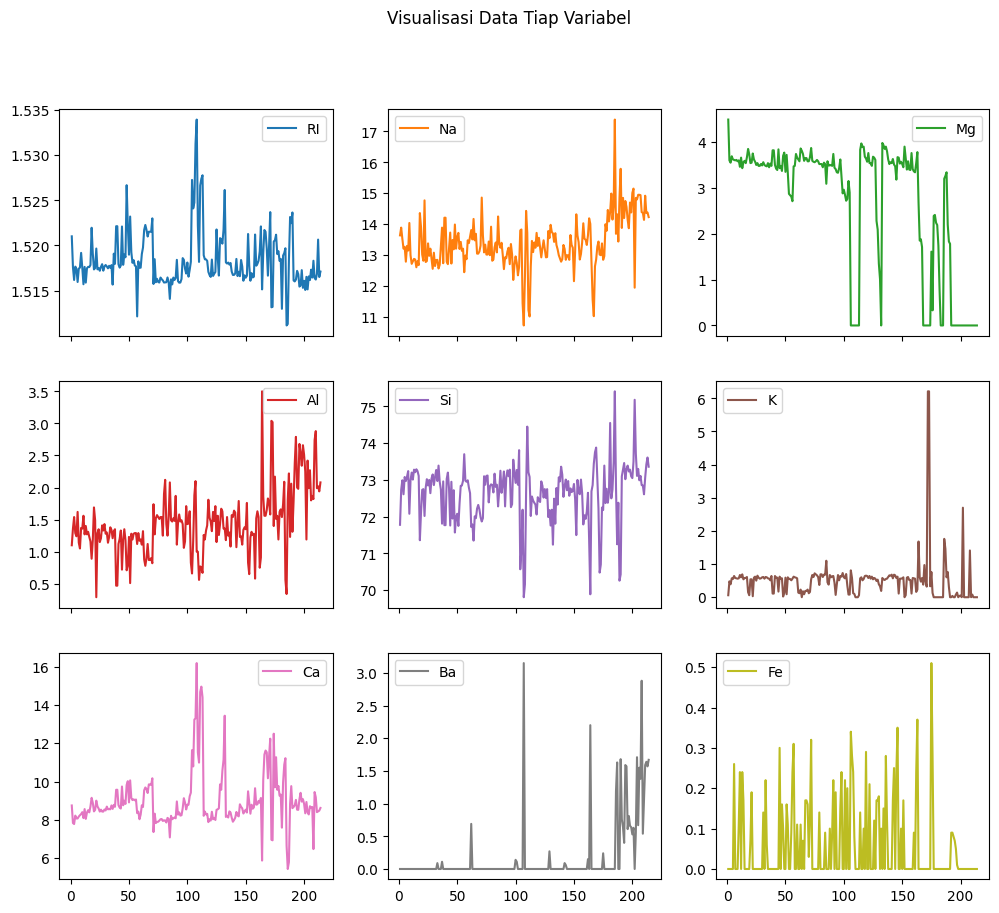

In [ ]:
df.loc[:, df.columns != "Type"].plot(kind="line", subplots=True, layout=(3, 3), figsize=(12, 10), title="Visualisasi Data Tiap Variabel")
plt.show()


Saya menggunakan df.loc[:, df.columns != "Type"] untuk mengecualikan Type karena tidak cocok sebagai kategori, lalu saya menggunakan .plot(kind="line", figsize=(12, 6), title="Visualisasi Data Tiap Variabel") dan kind="line" untuk membuat grafik garis untuk melihat tren data dan df.loc[:, df.columns != "Type"].plot(kind="line", subplots=True, layout=(3, 3), figsize=(12, 10), title="Visualisasi Data Tiap Variabel") plt.show() agar saya bisa melihat semua datanya dengan cara yang terpisah/satuan